In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Constants

In [3]:
WIN_VOTES = 270
SIMU_TIME = 10000

## Read Data and Check States Are Alined

In [4]:
elec_coll = pd.read_csv("data/electoralCollege.csv").sort_values(by="State")
prob_win = pd.read_csv("data/probWin.csv").sort_values(by="State")

In [5]:
elec_coll.head()

,State,Votes
0,Alabama,9
1,Alaska,3
2,Arizona,11
3,Arkansas,6
4,California,55


In [6]:
prob_win.head()

,State,ProbWin
37,Alabama,0%
36,Alaska,1%
28,Arizona,28%
38,Arkansas,0%
0,California,100%


In [7]:
(prob_win.State.to_numpy() == elec_coll.State.to_numpy()).all()

True

In [8]:
prob_win.ProbWin = prob_win.ProbWin.str.strip("%").astype("float")/100

## Simulation

In [9]:
p1_win_states = np.random.random_sample((SIMU_TIME, len(prob_win))) <= prob_win.ProbWin.to_numpy()
p1_votes = np.sum(p1_win_states * elec_coll.Votes.to_numpy(), axis=1)
p2_votes = np.sum(np.logical_not(p1_win_states) * elec_coll.Votes.to_numpy(), axis=1)

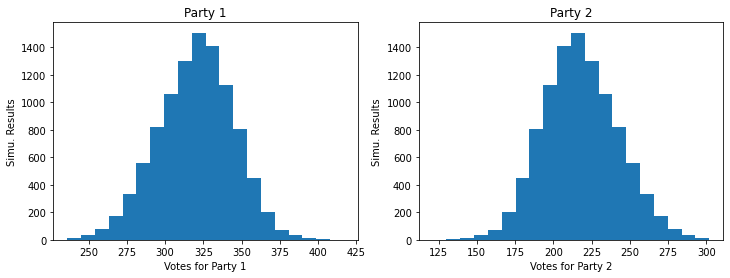

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
p1_ax, p2_ax = axes

p1_ax.hist(p1_votes, bins=20)
p1_ax.set_xlabel("Votes for Party 1")
p1_ax.set_ylabel("Simu. Results")
p1_ax.set_title("Party 1")

p2_ax.hist(p2_votes, bins=20)
p2_ax.set_xlabel("Votes for Party 2")
p2_ax.set_ylabel("Simu. Results")
p2_ax.set_title("Party 2")

fig.savefig("group1_hw6_q2.pdf")

In [11]:
p1_final_win = sum(p1_votes >= WIN_VOTES)
print("P1 Wins Prob. ", p1_final_win / SIMU_TIME)

p2_final_win = sum(p1_votes < WIN_VOTES)
print("P2 Wins Prob. ", p2_final_win / SIMU_TIME)

P1 Wins Prob.  0.9774
P2 Wins Prob.  0.0226
